In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_cv_9.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

10/05/2020 13:44:22 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/05/2020 13:44:23 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/05/2020 13:44:24 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/05/2020 13:44:25 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/05/2020 13:44:25 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

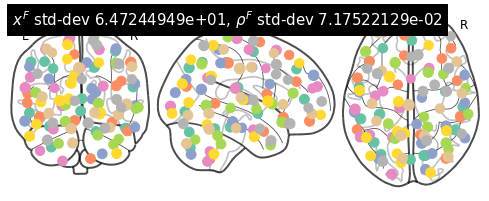

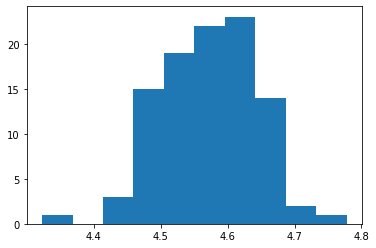

(<nilearn.plotting.displays.OrthoProjector at 0x7fce8d0c54d0>,
 tensor([[-3.1876e+01, -3.1132e+01, -2.1858e+01],
         [ 3.7205e+01, -6.9841e+00,  5.7437e+01],
         [ 4.7775e+01, -4.7685e+01, -2.3783e+01],
         [-3.7573e+01, -6.0703e+01,  4.6218e+01],
         [-2.8450e+01,  3.8370e+01,  3.8865e+01],
         [ 1.7681e+00,  4.6653e+01,  7.2205e+00],
         [ 4.9354e-01, -7.8934e+01, -5.7846e+00],
         [ 1.4878e+01, -7.4591e+01,  4.0423e+01],
         [-5.1789e+01, -3.6020e+01,  4.5754e+01],
         [ 5.5743e+01, -2.3328e+01,  1.9728e+01],
         [-5.3449e+01, -2.4202e+00, -7.6810e+00],
         [ 1.6612e+01, -7.4456e+01, -2.7263e+01],
         [-3.0445e+01, -7.3306e+01, -4.3735e+01],
         [ 3.3506e+01,  2.7561e+01, -1.7685e+01],
         [-1.2804e+01, -8.2460e-02,  6.7404e+01],
         [-6.0980e+00,  3.0684e+01,  5.3767e+01],
         [ 3.7953e+01, -7.7462e+01,  2.0830e+01],
         [ 4.3258e+01,  3.8251e+01,  2.5826e+01],
         [ 1.0885e+01, -5.2676e+01, -

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

472

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

10/05/2020 13:45:30 [Epoch 1] (6304ms) Posterior free-energy 8.34409677e+09 = KL from prior 1.19373160e+07 - log-likelihood -8.33215846e+09
10/05/2020 13:45:30 Saving checkpoint...
10/05/2020 13:45:36 [Epoch 2] (6185ms) Posterior free-energy 8.12988518e+09 = KL from prior 7.67340200e+06 - log-likelihood -8.12221082e+09
10/05/2020 13:45:42 [Epoch 3] (6117ms) Posterior free-energy 7.98060851e+09 = KL from prior 5.33144450e+06 - log-likelihood -7.97527757e+09
10/05/2020 13:45:48 [Epoch 4] (6129ms) Posterior free-energy 7.87648154e+09 = KL from prior 3.98247925e+06 - log-likelihood -7.87250074e+09
10/05/2020 13:45:54 [Epoch 5] (6112ms) Posterior free-energy 7.80398131e+09 = KL from prior 2.84481625e+06 - log-likelihood -7.80113510e+09
10/05/2020 13:46:01 [Epoch 6] (6148ms) Posterior free-energy 7.74458624e+09 = KL from prior 2.04824462e+06 - log-likelihood -7.74253773e+09
10/05/2020 13:46:07 [Epoch 7] (6127ms) Posterior free-energy 7.70054707e+09 = KL from prior 1.55360262e+06 - log-likeli

Epoch   412: reducing learning rate of group 0 to 5.0000e-03.
Epoch   412: reducing learning rate of group 1 to 5.0000e-04.
Epoch   412: reducing learning rate of group 2 to 5.0000e-03.
Epoch   412: reducing learning rate of group 3 to 5.0000e-04.


10/05/2020 14:26:59 [Epoch 413] (6027ms) Posterior free-energy 5.35551795e+09 = KL from prior 1.70032438e+06 - log-likelihood -5.35381760e+09
10/05/2020 14:27:05 [Epoch 414] (6035ms) Posterior free-energy 5.32230144e+09 = KL from prior 1.67605800e+06 - log-likelihood -5.32062566e+09
10/05/2020 14:27:11 [Epoch 415] (6028ms) Posterior free-energy 5.32076237e+09 = KL from prior 1.67389700e+06 - log-likelihood -5.31908813e+09
10/05/2020 14:27:17 [Epoch 416] (6027ms) Posterior free-energy 5.32022682e+09 = KL from prior 1.67030688e+06 - log-likelihood -5.31855616e+09
10/05/2020 14:27:23 [Epoch 417] (6022ms) Posterior free-energy 5.31967232e+09 = KL from prior 1.67266200e+06 - log-likelihood -5.31800013e+09
10/05/2020 14:27:29 [Epoch 418] (6025ms) Posterior free-energy 5.31925094e+09 = KL from prior 1.66966300e+06 - log-likelihood -5.31757978e+09
10/05/2020 14:27:35 [Epoch 419] (6019ms) Posterior free-energy 5.31892378e+09 = KL from prior 1.67012938e+06 - log-likelihood -5.31725312e+09
10/05/

Epoch   638: reducing learning rate of group 0 to 2.5000e-03.
Epoch   638: reducing learning rate of group 1 to 2.5000e-04.
Epoch   638: reducing learning rate of group 2 to 2.5000e-03.
Epoch   638: reducing learning rate of group 3 to 2.5000e-04.


10/05/2020 14:49:40 [Epoch 639] (6026ms) Posterior free-energy 5.29745818e+09 = KL from prior 1.72859650e+06 - log-likelihood -5.29573018e+09
10/05/2020 14:49:46 [Epoch 640] (6030ms) Posterior free-energy 5.29427866e+09 = KL from prior 1.72570225e+06 - log-likelihood -5.29255373e+09
10/05/2020 14:49:52 [Epoch 641] (6026ms) Posterior free-energy 5.29398835e+09 = KL from prior 1.72655175e+06 - log-likelihood -5.29226138e+09
10/05/2020 14:49:58 [Epoch 642] (6031ms) Posterior free-energy 5.29379072e+09 = KL from prior 1.72451562e+06 - log-likelihood -5.29206579e+09
10/05/2020 14:50:04 [Epoch 643] (6022ms) Posterior free-energy 5.29373594e+09 = KL from prior 1.72530862e+06 - log-likelihood -5.29201050e+09
10/05/2020 14:50:10 [Epoch 644] (6040ms) Posterior free-energy 5.29354803e+09 = KL from prior 1.72555812e+06 - log-likelihood -5.29182157e+09
10/05/2020 14:50:16 [Epoch 645] (6021ms) Posterior free-energy 5.29345843e+09 = KL from prior 1.72294650e+06 - log-likelihood -5.29173606e+09
10/05/

Epoch   725: reducing learning rate of group 0 to 1.2500e-03.
Epoch   725: reducing learning rate of group 1 to 1.2500e-04.
Epoch   725: reducing learning rate of group 2 to 1.2500e-03.
Epoch   725: reducing learning rate of group 3 to 1.2500e-04.


10/05/2020 14:58:29 [Epoch 726] (6136ms) Posterior free-energy 5.29072128e+09 = KL from prior 1.73727762e+06 - log-likelihood -5.28898355e+09
10/05/2020 14:58:36 [Epoch 727] (6125ms) Posterior free-energy 5.29056973e+09 = KL from prior 1.73124738e+06 - log-likelihood -5.28883814e+09
10/05/2020 14:58:42 [Epoch 728] (6094ms) Posterior free-energy 5.29044890e+09 = KL from prior 1.73191175e+06 - log-likelihood -5.28871680e+09
10/05/2020 14:58:48 [Epoch 729] (6022ms) Posterior free-energy 5.29038234e+09 = KL from prior 1.72990325e+06 - log-likelihood -5.28865331e+09
10/05/2020 14:58:54 [Epoch 730] (6029ms) Posterior free-energy 5.29027635e+09 = KL from prior 1.72790712e+06 - log-likelihood -5.28854835e+09
10/05/2020 14:59:00 [Epoch 731] (6021ms) Posterior free-energy 5.29026355e+09 = KL from prior 1.72782900e+06 - log-likelihood -5.28853606e+09
10/05/2020 14:59:06 [Epoch 732] (6043ms) Posterior free-energy 5.29028966e+09 = KL from prior 1.73123775e+06 - log-likelihood -5.28855910e+09
10/05/

Epoch   754: reducing learning rate of group 0 to 6.2500e-04.
Epoch   754: reducing learning rate of group 1 to 6.2500e-05.
Epoch   754: reducing learning rate of group 2 to 6.2500e-04.
Epoch   754: reducing learning rate of group 3 to 6.2500e-05.


10/05/2020 15:01:25 [Epoch 755] (6018ms) Posterior free-energy 5.28982067e+09 = KL from prior 1.72543988e+06 - log-likelihood -5.28809472e+09
10/05/2020 15:01:31 [Epoch 756] (6026ms) Posterior free-energy 5.28980531e+09 = KL from prior 1.72973038e+06 - log-likelihood -5.28807526e+09
10/05/2020 15:01:37 [Epoch 757] (6028ms) Posterior free-energy 5.28970445e+09 = KL from prior 1.72856688e+06 - log-likelihood -5.28797747e+09
10/05/2020 15:01:43 [Epoch 758] (6025ms) Posterior free-energy 5.28966656e+09 = KL from prior 1.72698550e+06 - log-likelihood -5.28794061e+09
10/05/2020 15:01:49 [Epoch 759] (6028ms) Posterior free-energy 5.28965069e+09 = KL from prior 1.72597938e+06 - log-likelihood -5.28792422e+09
10/05/2020 15:01:55 [Epoch 760] (6026ms) Posterior free-energy 5.28963072e+09 = KL from prior 1.72628250e+06 - log-likelihood -5.28790477e+09
10/05/2020 15:02:01 [Epoch 761] (6018ms) Posterior free-energy 5.28961997e+09 = KL from prior 1.72879762e+06 - log-likelihood -5.28788992e+09
10/05/

Epoch   780: reducing learning rate of group 0 to 3.1250e-04.
Epoch   780: reducing learning rate of group 1 to 3.1250e-05.
Epoch   780: reducing learning rate of group 2 to 3.1250e-04.
Epoch   780: reducing learning rate of group 3 to 3.1250e-05.


10/05/2020 15:04:02 [Epoch 781] (6018ms) Posterior free-energy 5.28928922e+09 = KL from prior 1.72504875e+06 - log-likelihood -5.28756429e+09
10/05/2020 15:04:08 [Epoch 782] (6150ms) Posterior free-energy 5.28933734e+09 = KL from prior 1.72623938e+06 - log-likelihood -5.28761139e+09
10/05/2020 15:04:14 [Epoch 783] (6189ms) Posterior free-energy 5.28931277e+09 = KL from prior 1.72501512e+06 - log-likelihood -5.28758733e+09
10/05/2020 15:04:20 [Epoch 784] (6028ms) Posterior free-energy 5.28936294e+09 = KL from prior 1.72744238e+06 - log-likelihood -5.28763494e+09
10/05/2020 15:04:26 [Epoch 785] (6030ms) Posterior free-energy 5.28935834e+09 = KL from prior 1.72979775e+06 - log-likelihood -5.28762778e+09
10/05/2020 15:04:32 [Epoch 786] (6028ms) Posterior free-energy 5.28928819e+09 = KL from prior 1.72783512e+06 - log-likelihood -5.28755968e+09
10/05/2020 15:04:38 [Epoch 787] (6022ms) Posterior free-energy 5.28928102e+09 = KL from prior 1.72553212e+06 - log-likelihood -5.28755661e+09
10/05/

Epoch   801: reducing learning rate of group 0 to 1.5625e-04.
Epoch   801: reducing learning rate of group 1 to 1.5625e-05.
Epoch   801: reducing learning rate of group 2 to 1.5625e-04.
Epoch   801: reducing learning rate of group 3 to 1.5625e-05.


10/05/2020 15:06:09 [Epoch 802] (6028ms) Posterior free-energy 5.28919142e+09 = KL from prior 1.72858538e+06 - log-likelihood -5.28746189e+09
10/05/2020 15:06:15 [Epoch 803] (6036ms) Posterior free-energy 5.28914330e+09 = KL from prior 1.72582600e+06 - log-likelihood -5.28741734e+09
10/05/2020 15:06:21 [Epoch 804] (6029ms) Posterior free-energy 5.28916326e+09 = KL from prior 1.72985150e+06 - log-likelihood -5.28743373e+09
10/05/2020 15:06:27 [Epoch 805] (6019ms) Posterior free-energy 5.28918221e+09 = KL from prior 1.72644800e+06 - log-likelihood -5.28745626e+09
10/05/2020 15:06:33 [Epoch 806] (6027ms) Posterior free-energy 5.28911616e+09 = KL from prior 1.72859600e+06 - log-likelihood -5.28738765e+09
10/05/2020 15:06:39 [Epoch 807] (6021ms) Posterior free-energy 5.28917606e+09 = KL from prior 1.72864662e+06 - log-likelihood -5.28744755e+09
10/05/2020 15:06:45 [Epoch 808] (6028ms) Posterior free-energy 5.28915507e+09 = KL from prior 1.72495500e+06 - log-likelihood -5.28743066e+09
10/05/

Epoch   827: reducing learning rate of group 0 to 7.8125e-05.
Epoch   827: reducing learning rate of group 1 to 1.0000e-05.
Epoch   827: reducing learning rate of group 2 to 7.8125e-05.
Epoch   827: reducing learning rate of group 3 to 1.0000e-05.


10/05/2020 15:08:46 [Epoch 828] (6031ms) Posterior free-energy 5.28912230e+09 = KL from prior 1.72974462e+06 - log-likelihood -5.28739174e+09
10/05/2020 15:08:52 [Epoch 829] (6023ms) Posterior free-energy 5.28910336e+09 = KL from prior 1.72693050e+06 - log-likelihood -5.28737741e+09
10/05/2020 15:08:58 [Epoch 830] (6031ms) Posterior free-energy 5.28903373e+09 = KL from prior 1.72800400e+06 - log-likelihood -5.28730624e+09
10/05/2020 15:09:04 [Epoch 831] (6025ms) Posterior free-energy 5.28911258e+09 = KL from prior 1.72884112e+06 - log-likelihood -5.28738355e+09
10/05/2020 15:09:10 [Epoch 832] (6032ms) Posterior free-energy 5.28913510e+09 = KL from prior 1.72729162e+06 - log-likelihood -5.28740608e+09
10/05/2020 15:09:16 [Epoch 833] (6025ms) Posterior free-energy 5.28914074e+09 = KL from prior 1.72894738e+06 - log-likelihood -5.28741171e+09
10/05/2020 15:09:22 [Epoch 834] (6040ms) Posterior free-energy 5.28909568e+09 = KL from prior 1.72688925e+06 - log-likelihood -5.28736922e+09
10/05/

Epoch   848: reducing learning rate of group 0 to 3.9063e-05.
Epoch   848: reducing learning rate of group 2 to 3.9063e-05.


10/05/2020 15:10:52 [Epoch 849] (6018ms) Posterior free-energy 5.28908339e+09 = KL from prior 1.72654950e+06 - log-likelihood -5.28735642e+09
10/05/2020 15:10:58 [Epoch 850] (6026ms) Posterior free-energy 5.28908032e+09 = KL from prior 1.72912425e+06 - log-likelihood -5.28735232e+09
10/05/2020 15:11:04 [Epoch 851] (6018ms) Posterior free-energy 5.28910848e+09 = KL from prior 1.72694700e+06 - log-likelihood -5.28738150e+09
10/05/2020 15:11:10 [Epoch 852] (6026ms) Posterior free-energy 5.28892877e+09 = KL from prior 1.73051762e+06 - log-likelihood -5.28719872e+09
10/05/2020 15:11:16 [Epoch 853] (6020ms) Posterior free-energy 5.28900403e+09 = KL from prior 1.72847900e+06 - log-likelihood -5.28727603e+09
10/05/2020 15:11:22 [Epoch 854] (6030ms) Posterior free-energy 5.28914176e+09 = KL from prior 1.72369500e+06 - log-likelihood -5.28741837e+09
10/05/2020 15:11:28 [Epoch 855] (6027ms) Posterior free-energy 5.28903322e+09 = KL from prior 1.72795988e+06 - log-likelihood -5.28730470e+09
10/05/

Epoch   869: reducing learning rate of group 0 to 1.9531e-05.
Epoch   869: reducing learning rate of group 2 to 1.9531e-05.


10/05/2020 15:12:59 [Epoch 870] (6026ms) Posterior free-energy 5.28902400e+09 = KL from prior 1.72667250e+06 - log-likelihood -5.28729702e+09
10/05/2020 15:13:05 [Epoch 871] (6028ms) Posterior free-energy 5.28901069e+09 = KL from prior 1.72686188e+06 - log-likelihood -5.28728422e+09
10/05/2020 15:13:11 [Epoch 872] (6026ms) Posterior free-energy 5.28899789e+09 = KL from prior 1.72795650e+06 - log-likelihood -5.28726989e+09
10/05/2020 15:13:17 [Epoch 873] (6019ms) Posterior free-energy 5.28911053e+09 = KL from prior 1.72812688e+06 - log-likelihood -5.28738202e+09
10/05/2020 15:13:23 [Epoch 874] (6031ms) Posterior free-energy 5.28902912e+09 = KL from prior 1.73010975e+06 - log-likelihood -5.28730010e+09
10/05/2020 15:13:29 [Epoch 875] (6025ms) Posterior free-energy 5.28903885e+09 = KL from prior 1.72422488e+06 - log-likelihood -5.28731392e+09
10/05/2020 15:13:35 [Epoch 876] (6131ms) Posterior free-energy 5.28901734e+09 = KL from prior 1.72488725e+06 - log-likelihood -5.28729293e+09
10/05/

Epoch   890: reducing learning rate of group 0 to 1.0000e-05.
Epoch   890: reducing learning rate of group 2 to 1.0000e-05.


10/05/2020 15:15:07 [Epoch 891] (6122ms) Posterior free-energy 5.28899226e+09 = KL from prior 1.72645100e+06 - log-likelihood -5.28726682e+09
10/05/2020 15:15:13 [Epoch 892] (6027ms) Posterior free-energy 5.28902502e+09 = KL from prior 1.72527738e+06 - log-likelihood -5.28730010e+09
10/05/2020 15:15:19 [Epoch 893] (6018ms) Posterior free-energy 5.28910131e+09 = KL from prior 1.72433125e+06 - log-likelihood -5.28737536e+09
10/05/2020 15:15:25 [Epoch 894] (6055ms) Posterior free-energy 5.28900608e+09 = KL from prior 1.72956800e+06 - log-likelihood -5.28727654e+09
10/05/2020 15:15:31 [Epoch 895] (6031ms) Posterior free-energy 5.28893594e+09 = KL from prior 1.72652200e+06 - log-likelihood -5.28721050e+09
10/05/2020 15:15:37 [Epoch 896] (6033ms) Posterior free-energy 5.28897741e+09 = KL from prior 1.72709075e+06 - log-likelihood -5.28724890e+09
10/05/2020 15:15:44 [Epoch 897] (6021ms) Posterior free-energy 5.28903168e+09 = KL from prior 1.72678150e+06 - log-likelihood -5.28730573e+09
10/05/

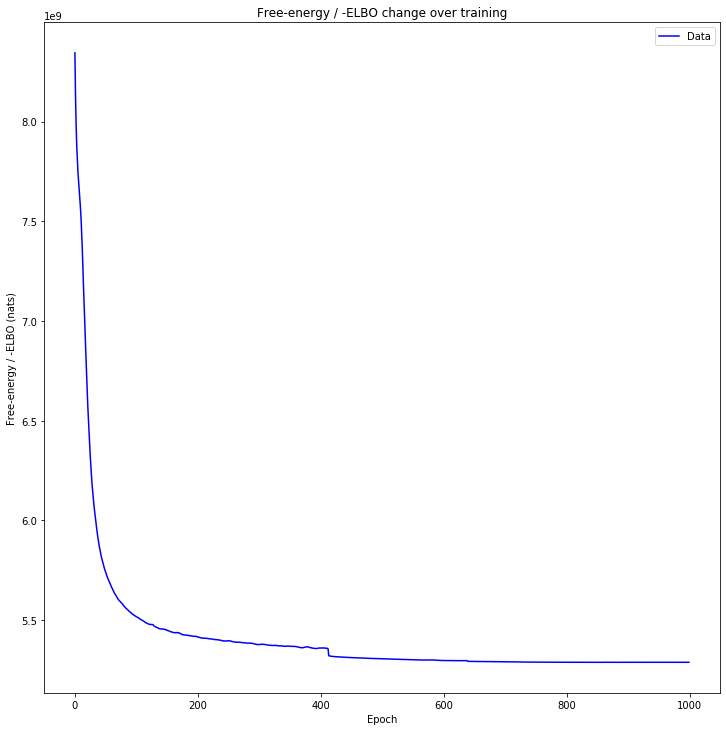

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

10/05/2020 15:26:06 [Epoch 1] (696ms) Posterior free-energy 1.27611827e+09 = KL from prior 9.80333906e+04 - log-likelihood -1.27602010e+09
10/05/2020 15:26:06 Saving checkpoint...
10/05/2020 15:26:07 [Epoch 2] (700ms) Posterior free-energy 1.25965542e+09 = KL from prior 1.00045555e+05 - log-likelihood -1.25955546e+09
10/05/2020 15:26:08 [Epoch 3] (703ms) Posterior free-energy 1.22650701e+09 = KL from prior 9.17032109e+04 - log-likelihood -1.22641536e+09
10/05/2020 15:26:08 [Epoch 4] (703ms) Posterior free-energy 1.19800064e+09 = KL from prior 9.00103828e+04 - log-likelihood -1.19791053e+09
10/05/2020 15:26:09 [Epoch 5] (700ms) Posterior free-energy 1.19494438e+09 = KL from prior 8.76898750e+04 - log-likelihood -1.19485670e+09
10/05/2020 15:26:10 [Epoch 6] (704ms) Posterior free-energy 1.15729523e+09 = KL from prior 8.62019844e+04 - log-likelihood -1.15720909e+09
10/05/2020 15:26:10 [Epoch 7] (702ms) Posterior free-energy 1.13906829e+09 = KL from prior 8.48407188e+04 - log-likelihood -1

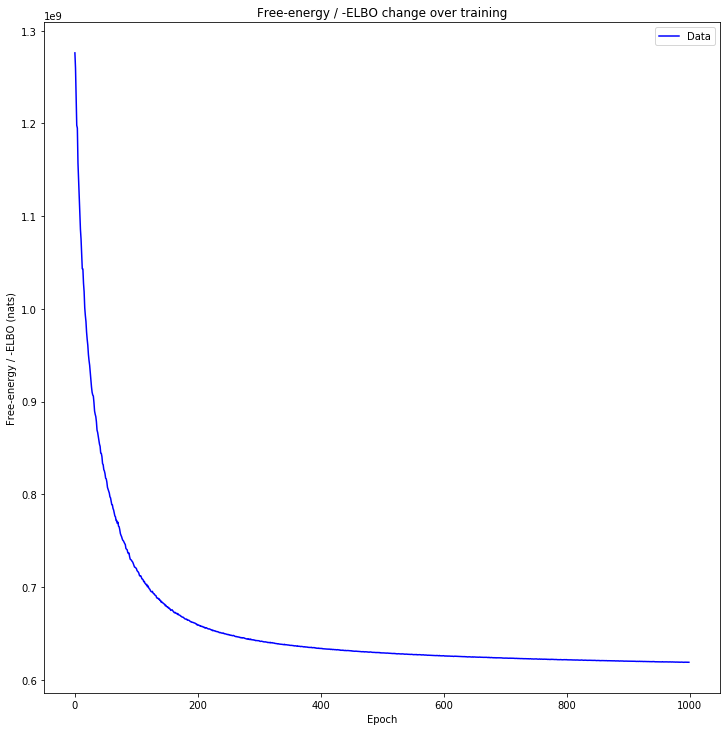

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

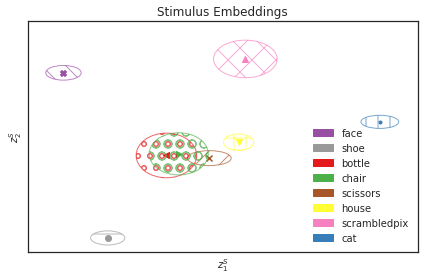

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

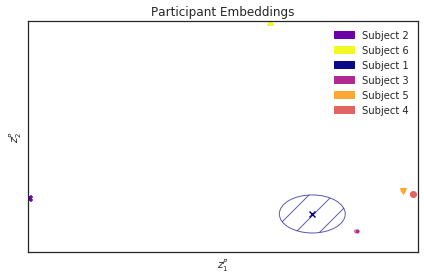

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

10/05/2020 15:37:52 Plotting factors for Participant 2, run 7


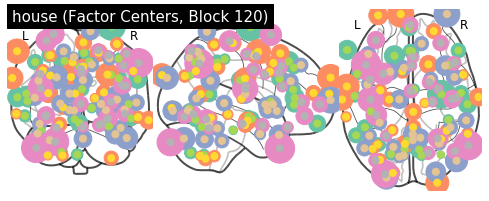

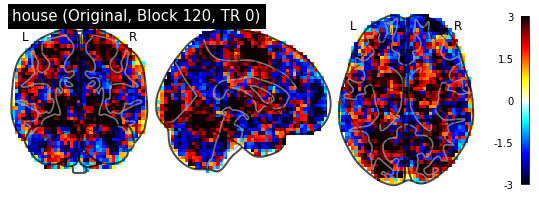

10/05/2020 15:37:54 Reconstruction Error (Frobenius Norm): 1.21473671e+02 out of 6.82859863e+02


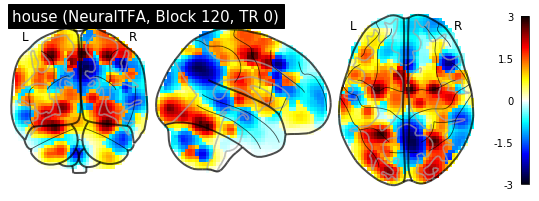

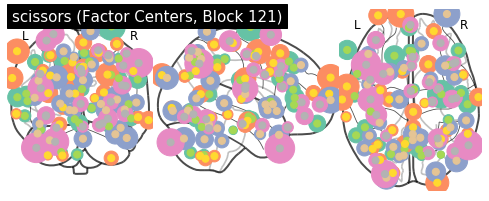

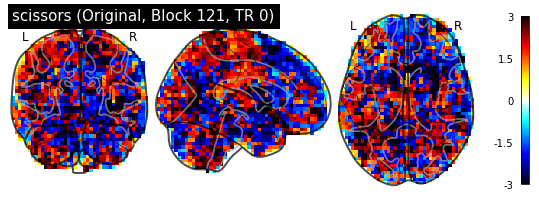

10/05/2020 15:37:57 Reconstruction Error (Frobenius Norm): 1.13898376e+02 out of 6.00198181e+02


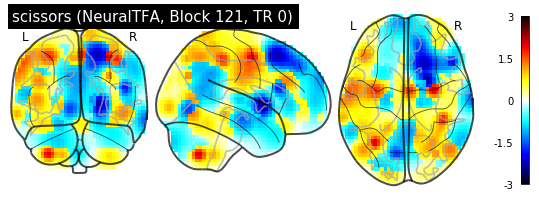

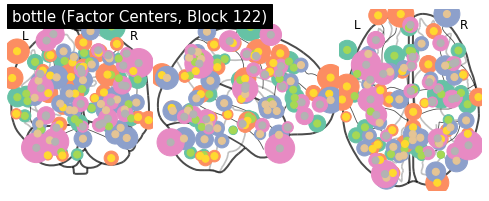

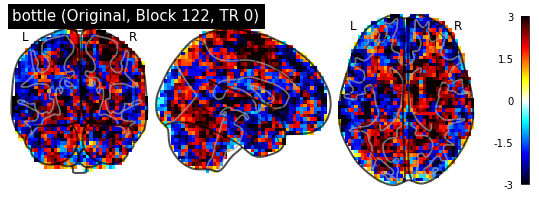

10/05/2020 15:38:00 Reconstruction Error (Frobenius Norm): 1.08187347e+02 out of 6.44000854e+02


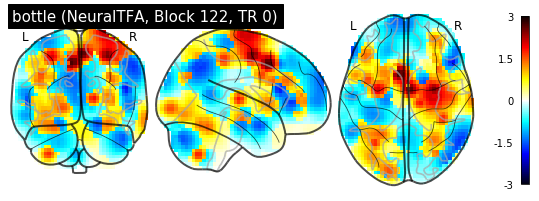

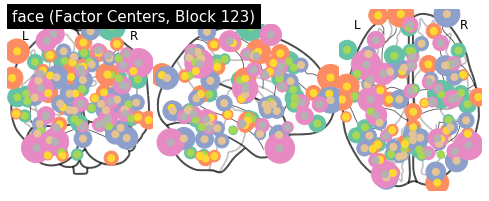

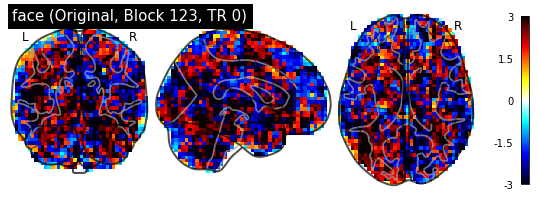

10/05/2020 15:38:03 Reconstruction Error (Frobenius Norm): 1.24524712e+02 out of 6.50583679e+02


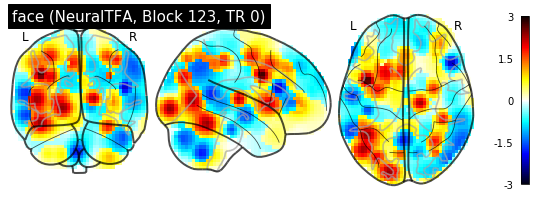

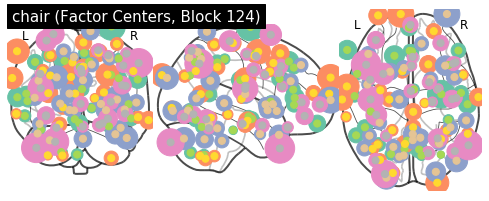

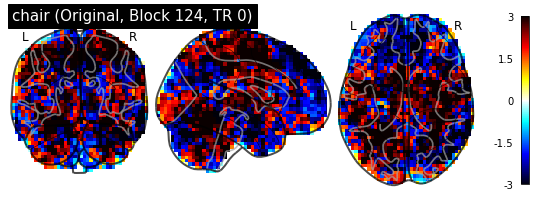

10/05/2020 15:38:05 Reconstruction Error (Frobenius Norm): 1.13244591e+02 out of 6.13922791e+02


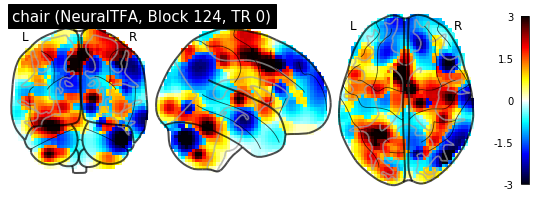

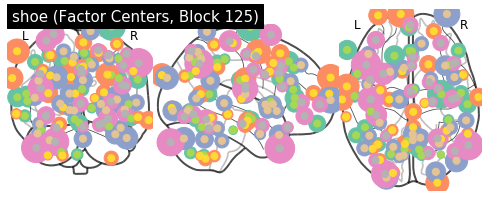

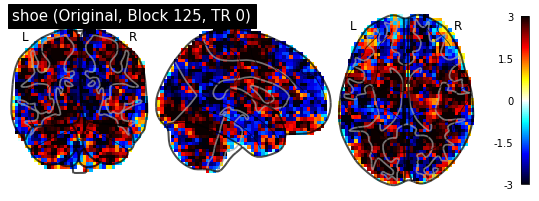

10/05/2020 15:38:08 Reconstruction Error (Frobenius Norm): 1.17032127e+02 out of 6.20156250e+02


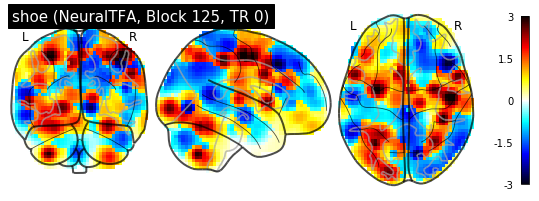

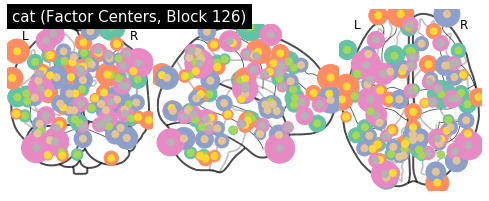

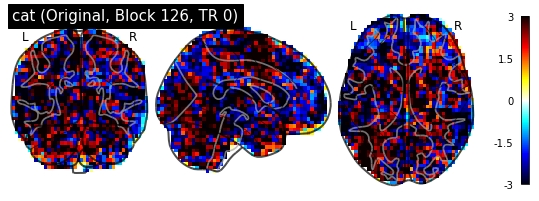

10/05/2020 15:38:11 Reconstruction Error (Frobenius Norm): 1.18041428e+02 out of 6.38475952e+02


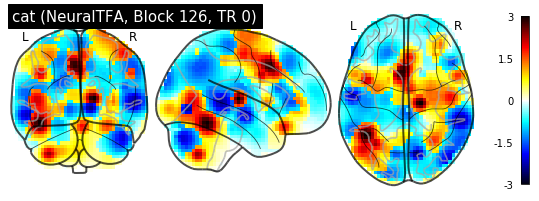

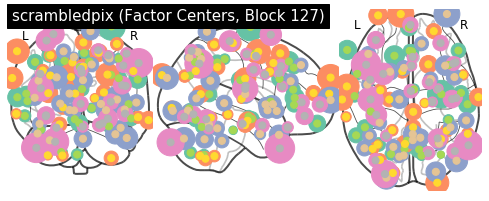

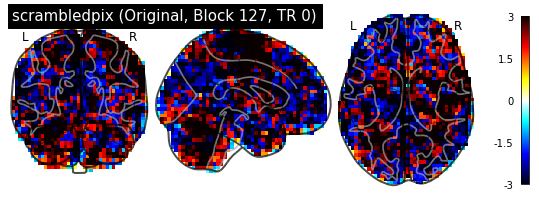

10/05/2020 15:38:14 Reconstruction Error (Frobenius Norm): 1.24824066e+02 out of 6.73383118e+02


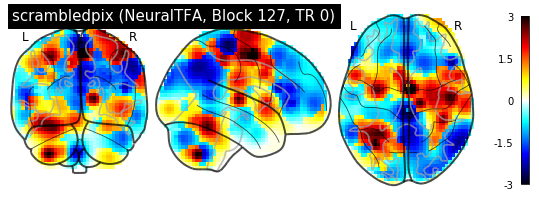

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

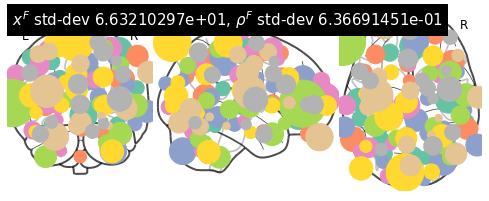

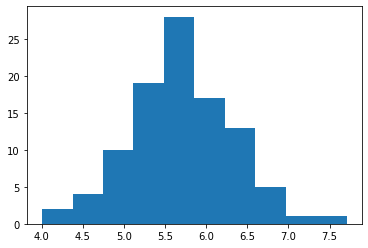

(<nilearn.plotting.displays.OrthoProjector at 0x7fce4c608b50>,
 tensor([[-3.1381e+01, -4.7392e+01, -2.0824e+01],
         [ 4.0759e+01, -1.5915e+01,  5.7669e+01],
         [ 3.9224e+01, -5.8868e+01, -2.0195e+01],
         [-2.9975e+01, -5.8111e+01,  4.6254e+01],
         [-2.1291e+01,  3.3649e+01,  2.7858e+01],
         [ 3.5199e+00,  4.0605e+01, -1.0209e+01],
         [ 2.4402e+00, -7.6891e+01, -4.7229e+00],
         [ 1.6376e+01, -7.6750e+01,  3.4250e+01],
         [-5.2958e+01, -3.5851e+01,  5.0767e+01],
         [ 5.9695e+01, -3.8968e+01,  1.8468e+01],
         [-5.4573e+01, -1.6159e+01,  2.4472e+00],
         [ 2.4277e+01, -7.3664e+01, -1.6875e+01],
         [-2.8078e+01, -7.2474e+01, -4.3006e+01],
         [ 2.6394e+01,  5.1593e+01, -2.8780e+01],
         [-7.0134e-01,  4.1333e+00,  5.3888e+01],
         [-2.6735e+00,  2.1617e+01,  5.5681e+01],
         [ 3.1911e+01, -7.6882e+01,  3.0798e+01],
         [ 4.4377e+01,  2.3188e+01,  2.7362e+01],
         [ 9.9406e-02, -5.6208e+01, -

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

10/05/2020 15:38:24 Average reconstruction error (MSE): 5.23778857e+02 +/- 4.17364812e+01
10/05/2020 15:38:24 Average data norm (Euclidean): 6.06332720e+02 +/- 6.15861929e+01
10/05/2020 15:38:24 Percent average reconstruction error: 86.648331 +/- 4.02740912e+00


(array([556.45196533, 534.00537109, 498.1463623 , 506.42962646,
        522.84411621, 507.62322998, 511.1519165 , 485.57873535,
        555.92700195, 526.48419189, 499.0534668 , 448.99993896,
        468.73071289, 488.66995239, 545.85797119, 540.52740479,
        499.0880127 , 495.82266235, 468.64489746, 500.35333252,
        478.01721191, 532.60473633, 500.85031128, 508.71755981,
        614.99285889, 545.69195557, 507.93032837, 531.94622803,
        476.54464722, 511.79547119, 513.91485596, 475.32983398,
        582.88433838, 523.45532227, 465.68847656, 493.57324219,
        528.75292969, 489.97009277, 504.55206299, 539.37548828,
        592.24768066, 499.6786499 , 496.97967529, 519.04534912,
        524.93103027, 508.05718994, 542.43774414, 490.03210449,
        522.70562744, 534.75567627, 483.77505493, 455.78118896,
        507.43487549, 551.89971924, 517.45666504, 548.77233887,
        455.0375061 , 449.22146606, 466.77426147, 448.49526978,
        465.51785278, 465.56234741, 431.

In [22]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))

[[618917248.0, -618766272.0, 151039.234375],
 [619036160.0, -618562816.0, 151461.453125]]